In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

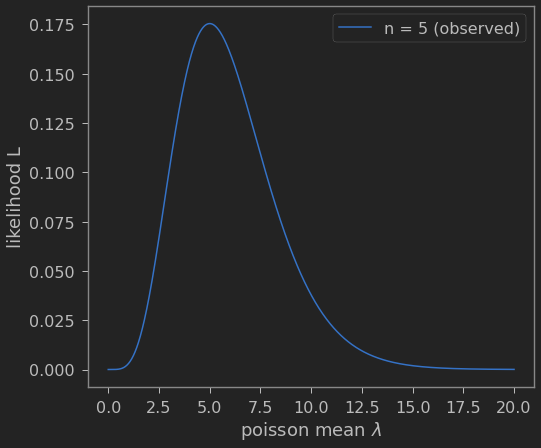

In [11]:
def poisson_likelihood(lambda_mu, counts_obs = 5):
    return poisson.pmf(counts_obs, lambda_mu)

xvals = np.linspace(0.0, 20, 1000)
yvals = poisson_likelihood(xvals)

plt.plot(xvals, yvals, label='n = 5 (observed)')
plt.legend(fontsize=16)
plt.xlabel("poisson mean $\lambda$", fontsize=18)
plt.ylabel("likelihood L", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

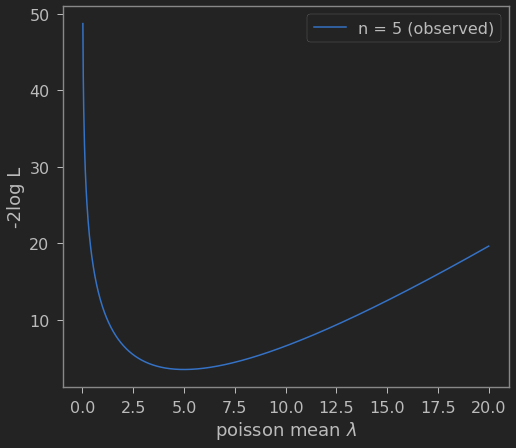

In [14]:
def poisson_log_likelihood(lambda_mu, counts_obs = 5):
    return poisson.logpmf(counts_obs, lambda_mu)

xvals = np.linspace(0.0, 20, 1000)
yvals = -2 * poisson_log_likelihood(xvals)

plt.plot(xvals, yvals, label='n = 5 (observed)')
plt.legend(fontsize=16)
plt.xlabel("poisson mean $\lambda$", fontsize=18)
plt.ylabel("-2log L", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [20]:
def test_statistic_example(counts_obs, lambda_s = 3, lambda_b = 5):
    ll1 = poisson.logpmf(counts_obs, lambda_s + lambda_b)
    ll0 = poisson.logpmf(counts_obs, lambda_b)  
    return -2 * (ll0 - ll1)

[-8.         -5.92055846 -4.5342641  -3.55343484 -2.86028766 -2.39028403
 -2.10260196 -1.96907057 -1.96907057 -2.0868536 ] [-5.         -3.39056209 -2.47427136 -1.96344573 -1.74030218 -1.74030218
 -1.92262374 -2.25909597 -2.7290996  -3.31688627]


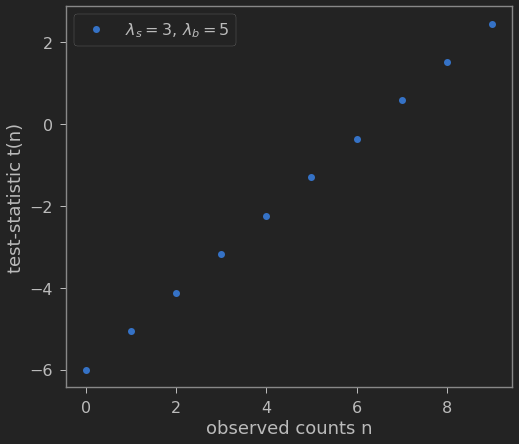

In [26]:
xvals = np.arange(10)
yvals = test_statistic_example(xvals)
plt.plot(xvals, yvals, "bo", label='$\lambda_s=3,\,\lambda_b=5$')
plt.legend(fontsize=16)
plt.xlabel("observed counts n", fontsize=18)
plt.ylabel("test-statistic t(n)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

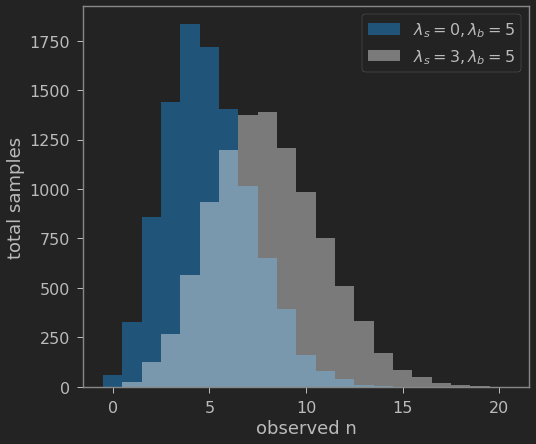

In [43]:
# generate background counts
lambda_b = 5
lambda_s = 3

np.random.seed(0)
counts_bkg = np.random.poisson(lambda_b, 10000)
counts_sig_bkg = np.random.poisson(lambda_s + lambda_b, 10000)


edges = np.linspace(-0.5, 20.5, 22)
plt.hist(counts_bkg, bins=edges, alpha=0.6, color='tab:blue', label='$\lambda_s=0, \lambda_b=5$')
plt.hist(counts_sig_bkg, bins=edges, alpha=0.4, color='white', label='$\lambda_s=3, \lambda_b=5$')

plt.ylabel("total samples", fontsize=18)
plt.xlabel("observed n", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

plt.show()

[-2.0868536  -2.39028403 -2.10260196 ... -3.55343484 -1.96907057
 -2.86028766] [-3.31688627 -1.74030218 -1.92262374 ... -1.96344573 -2.25909597
 -1.74030218]
[-2.10260196 -2.0868536  -2.10260196 ... -2.30999716 -1.96907057
 -2.39028403] [-1.92262374 -3.31688627 -1.92262374 ... -4.01003345 -2.7290996
 -1.74030218]


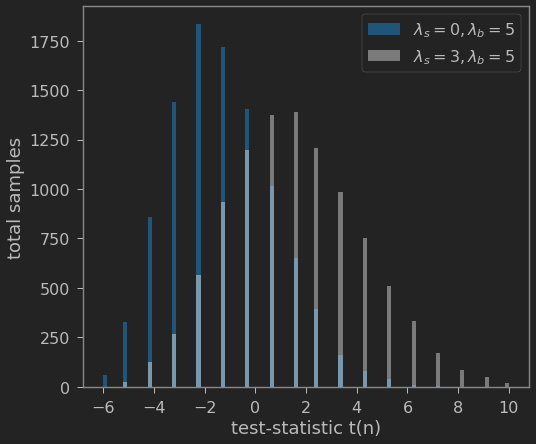

In [42]:
tstats_bkg = test_statistic_example(counts_bkg)
tstats_sig_bkg = test_statistic_example(counts_sig_bkg)

edges = np.linspace(-6, 10, 101)
plt.hist(tstats_bkg, bins=edges, alpha=0.6, color='tab:blue', label='$\lambda_s=0, \lambda_b=5$')
plt.hist(tstats_sig_bkg, bins=edges, alpha=0.4, color='white', label='$\lambda_s=3, \lambda_b=5$')

plt.ylabel("total samples", fontsize=18)
plt.xlabel("test-statistic t(n)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

plt.show()

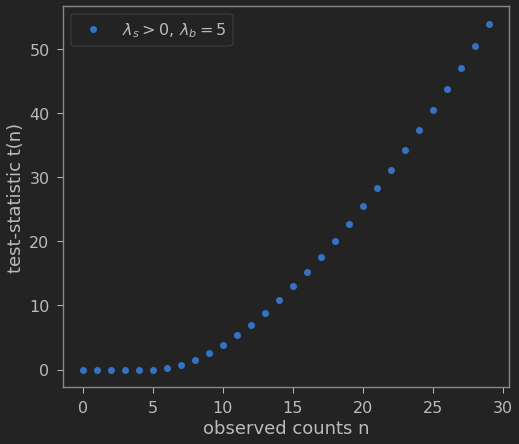

In [72]:
def test_statistic_one_sided(counts, lambda_b = 5):
    
    test_statistics = np.zeros(len(counts))
    idx = counts > lambda_b
    
    test_statistics[idx] = 2 * lambda_b
    test_statistics[idx] -= 2 * counts[idx] * (np.log(lambda_b) + 1 - np.log(counts[idx]))    
    
    return test_statistics

xvals = np.arange(0, 30)
yvals = test_statistic_one_sided(xvals)

plt.plot(xvals, yvals, "bo", label='$\lambda_s>0,\,\lambda_b=5$')
plt.legend(fontsize=16)
plt.xlabel("observed counts n", fontsize=18)
plt.ylabel("test-statistic t(n)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


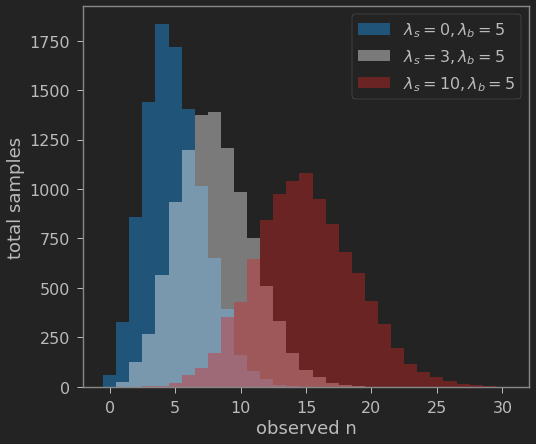

In [69]:
# generate background counts
lambda_b = 5
lambda_s = 3
lambda_s2 = 10

np.random.seed(0)
counts_bkg = np.random.poisson(lambda_b, 10000)
counts_sig_bkg = np.random.poisson(lambda_s + lambda_b, 10000)
counts_sig_bkg2 = np.random.poisson(lambda_s2 + lambda_b, 10000)


edges = np.linspace(-0.5, 30.5, 32)
plt.hist(counts_bkg, bins=edges, alpha=0.6, color='tab:blue', label='$\lambda_s=0, \lambda_b=5$')
plt.hist(counts_sig_bkg, bins=edges, alpha=0.4, color='white', label='$\lambda_s=3, \lambda_b=5$')
plt.hist(counts_sig_bkg2, bins=edges, alpha=0.4, color='tab:red', label='$\lambda_s=10, \lambda_b=5$')


plt.ylabel("total samples", fontsize=18)
plt.xlabel("observed n", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

plt.show()

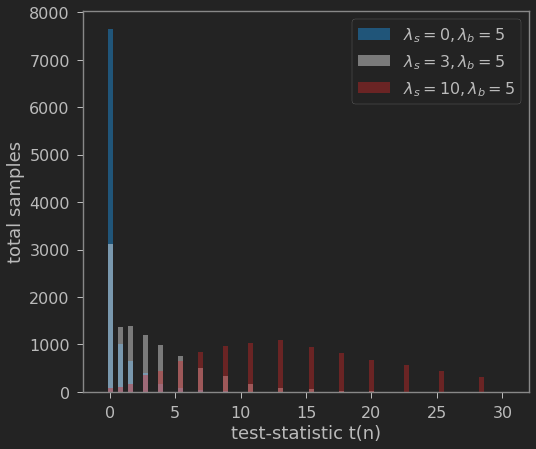

In [70]:
edges = np.linspace(-0.5, 30.5, 82)
plt.hist(test_statistic_one_sided(counts_bkg), bins=edges, alpha=0.6,  color='tab:blue', label=f'$\lambda_s=0, \lambda_b=5$')
plt.hist(test_statistic_one_sided(counts_sig_bkg), bins=edges, alpha=0.4,  color='white', label=f'$\lambda_s=3, \lambda_b=5$')
plt.hist(test_statistic_one_sided(counts_sig_bkg2), bins=edges, alpha=0.4,  color='tab:red', label=f'$\lambda_s=10, \lambda_b=5$')

plt.ylabel("total samples", fontsize=18)
plt.xlabel("test-statistic t(n)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)

plt.show()